# CS366 Final Project - Myers-Briggs

We use a dataset from [Kaggle](https://www.kaggle.com/datasnaek/mbti-type), that was collected from the [Personality Cafe forum](https://www.personalitycafe.com/forum/). The dataset contains the a persons 4 letter MBTI type and the last 50 things they posted on the forums. In total there are over 8600 rows of data corresponding to different users. 

### Myers-Briggs
There are a total  of 16 distict and different personality types that the Myers-Briggs Type Indicator (MBTI) assigns:

|  ES  |  IS  |  EN  |  IN  |
|------|------|------|------|
| ESTJ | ISTJ | ENTJ | INTJ |
| ESTP | ISTP | ENTP | INTP |
| ESFJ | ISFJ | ENFJ | INFJ |
| ESFP | ISFP | ENFP | INFP |


- Introversion (I) – Extroversion (E)
- Intuition (N) – Sensing (S)
- Thinking (T) – Feeling (F)
- Judging (J) – Perceiving (P)


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [17]:
data = pd.read_csv('/users/kdeuser/Desktop/CMPU366/FinalProject/mbti_1.csv') 
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


The user posts are split by ||| between each post, so in order to see a list of the posts we split by the |||'s'

In [18]:
[p.split('|||') for p in data.head(2).posts.values]

[["'http://www.youtube.com/watch?v=qsXHcwe3krw",
  'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
  'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
  'What has been the most life-changing experience in your life?',
  'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
  'May the PerC Experience immerse you.',
  'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
  "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
  '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04

### Distribution of the MBTI personality types

In [19]:
data.groupby('type').agg({'type':'count'})

,type
type,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


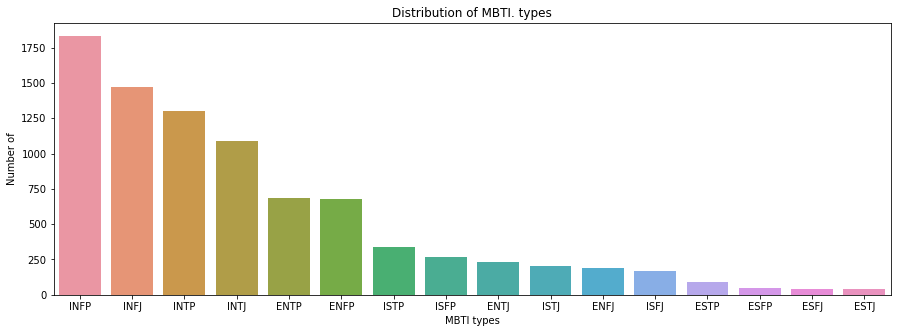

In [20]:
# get the count of each personality type
types = data['type'].value_counts()

# create the table
plt.figure(figsize=(15,5))
sns.barplot(types.index, types.values)
plt.xlabel('MBTI types')
plt.ylabel("Number of")
plt.title('Distribution of MBTI. types')
plt.show()

### Comment Information

In [21]:
#word counts of comments
def comment_split(row):
    comments = []
    for i in row.split('|||'):
        comment_len = len(i.split())
        comments  = np.append(comments, comment_len)
    return comments
        
data['number of words per user'] = data['posts'].apply(lambda x : sum(comment_split(x)))
data['average number of words per comment'] = data['posts'].apply(lambda x: len(x.split())/ 50)
data.head()

,type,posts,number of words per user,average number of words per comment
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,605.0,11.12
1,ENTP,'I'm finding the lack of me in these posts ver...,1219.0,23.40
2,INTP,'Good one _____ https://www.youtube.com/wat...,885.0,16.72
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1113.0,21.28
4,ENTJ,'You're fired.|||That's another silly misconce...,1016.0,19.34


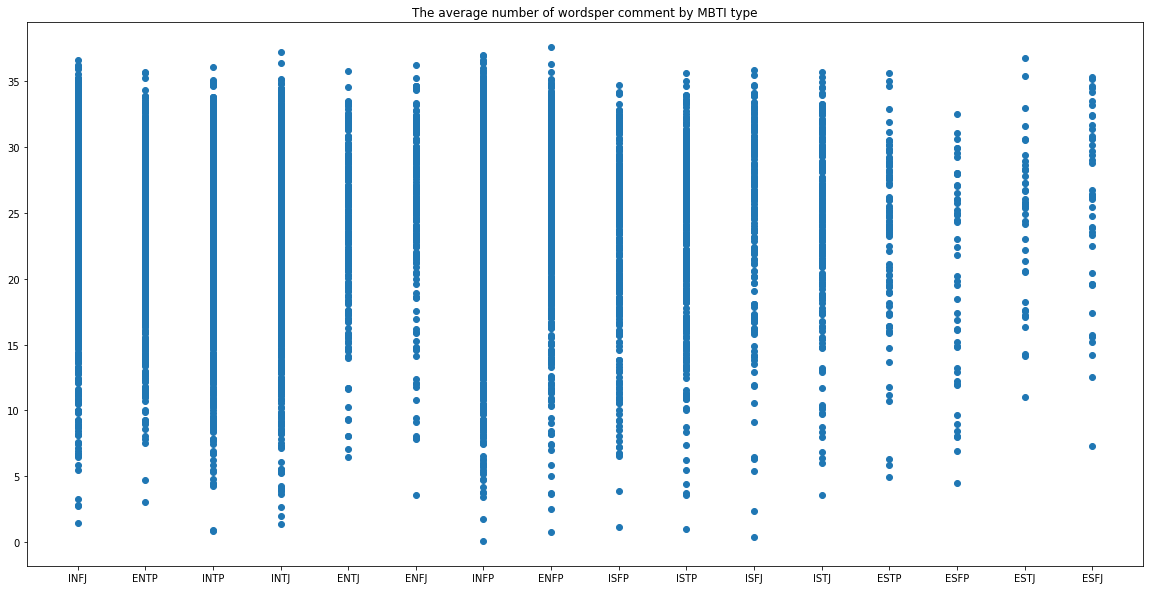

In [22]:
# plot the average. numberof words per comment against the. type
plt.figure(figsize=(20,10))
plt.title('The average number of wordsper comment by MBTI type')
plt.scatter('type', 'average number of words per comment', data=data)

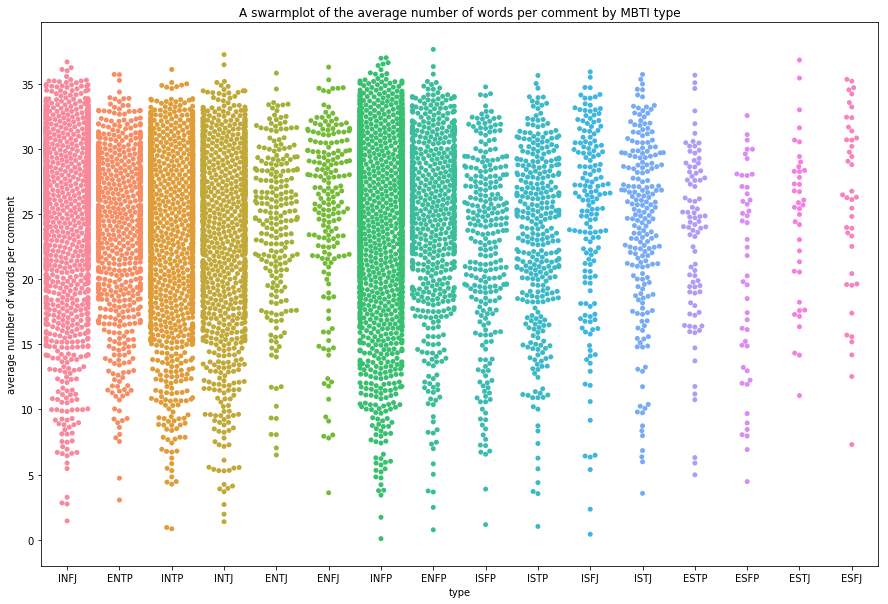

In [23]:
plt.figure(figsize=(15,10))
plt.title('A swarmplot of the average number of words per comment by MBTI type')
sns.swarmplot('type', 'average number of words per comment', data=data)

### Type Indicators
The type indicators are classified by:
- Introversion (I) – Extroversion (E)
- Intuition (N) – Sensing (S)
- Thinking (T) – Feeling (F)
- Judging (J) – Perceiving (P)

In [24]:
def types(row):
    t = row['type']
    
    #set IE,  NS, TF, JP to be 0
    IE = 0;
    NS = 0;
    TF = 0;
    JP = 0;
    
    #check if the first letter of the type is I or E
    # if I set to 1 and E to 0
    if t[0] == 'I':
        IE = 0
    elif t[0] == 'E':
        IE = 1
    else:
        print('IE error')
        
    # check if the second letter is N or S, if N set to 1 and S set to 0
    if t[1] == 'N':
        NS = 0
    elif t[1] == 'S':
        NS = 1
    else:
        print('NS error')
        
    # check if the thrid letter is T of F, if T set to 1 and F to 0
    if t[2] == 'T':
        TF = 0
    elif t[2]  == 'F':
        TF = 1
    else:
        print('TF error')
        
    # check if the last letter is J or P
    if t[3]  ==  'J':
        JP = 0
    elif t[3] == 'P':
        JP = 1
    else:
        print('JP error')
        
    return pd.Series({'IE':IE, 'NS':NS, 'TF':TF, 'JP':JP})
    

In [25]:
data = data.join(data.apply(lambda row: types(row), axis=1))
data.head()

,type,posts,number of words per user,average number of words per comment,IE,JP,NS,TF
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,605.0,11.12,0,0,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,1219.0,23.40,1,1,0,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,885.0,16.72,0,1,0,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1113.0,21.28,0,0,0,0
4,ENTJ,'You're fired.|||That's another silly misconce...,1016.0,19.34,1,0,0,0


In [26]:
#show  the ratios of 0's to 1's
print("Introvert - Extrovert: \t", data['IE'].value_counts()[0],"-",data['IE'].value_counts()[1])
print("Intuition - Sensing: \t", data['NS'].value_counts()[0],"-",data['NS'].value_counts()[1])
print("Thinking - Feeling: \t", data['TF'].value_counts()[0],"-",data['TF'].value_counts()[1])
print("Judging - Percieving: \t", data['JP'].value_counts()[0],"-",data['JP'].value_counts()[1])

Introvert - Extrovert: 	 6676 - 1999
Intuition - Sensing: 	 7478 - 1197
Thinking - Feeling: 	 3981 - 4694
Judging - Percieving: 	 3434 - 5241


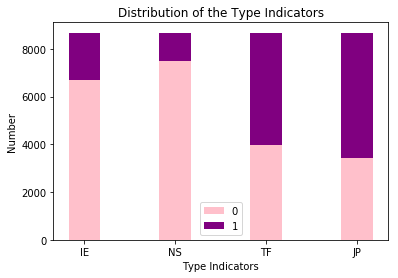

In [27]:
#show the distribution got each
N = 4
zeros = (data['IE'].value_counts()[0], data['NS'].value_counts()[0], data['TF'].value_counts()[0], data['JP'].value_counts()[0])
ones = (data['IE'].value_counts()[1], data['NS'].value_counts()[1], data['TF'].value_counts()[1], data['JP'].value_counts()[1])
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, zeros, width, color='pink')
p2 = plt.bar(ind, ones, width,
             bottom=zeros, color='purple')

plt.ylabel('Number')
plt.xlabel('Type Indicators')
plt.title('Distribution of the Type Indicators')
plt.xticks(ind, ('IE', 'NS', 'TF', 'JP'))
plt.legend((p1[0], p2[0]), ('0', '1'))

plt.show()

### Person Feature Correlation

In [28]:
corr = data[['IE','NS','TF','JP']].corr()
corr

,IE,NS,TF,JP
IE,1.000000,-0.045899,-0.069573,0.161939
NS,-0.045899,1.000000,-0.080954,0.014922
TF,-0.069573,-0.080954,1.000000,-0.004673
JP,0.161939,0.014922,-0.004673,1.000000


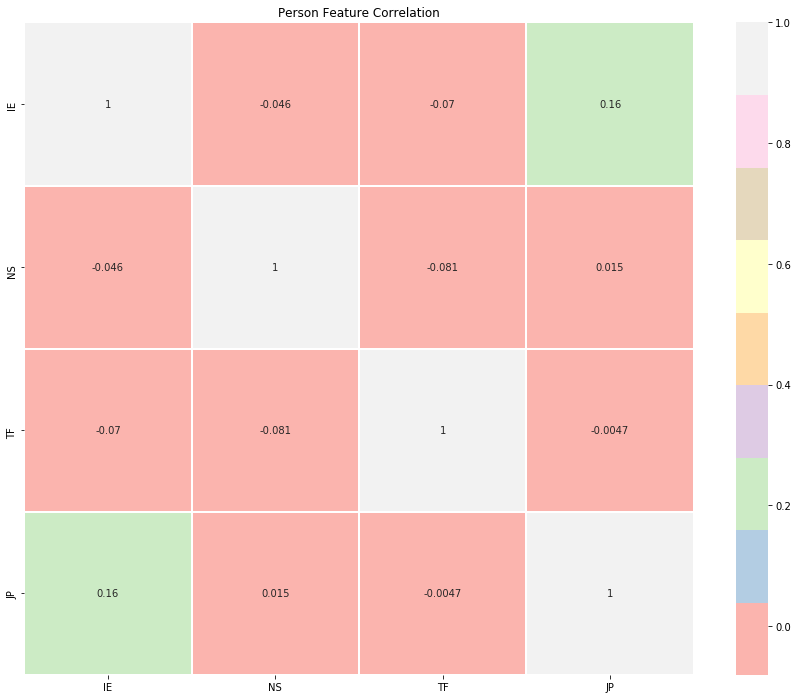

In [30]:
cmap = plt.cm.Pastel1
plt.figure(figsize=(15,12))
plt.title("Person Feature Correlation")
sns.heatmap(corr, cmap=cmap,  annot=True, linewidths=1)